<a href="https://colab.research.google.com/github/jineshajain123/ELEVATE-LABS-project/blob/main/Elevate_Lab_healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Section 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Section 2: Load Data
df = pd.read_csv('/content/KaggleV2-May-2016.csv')

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
# Section 3: Data Cleaning & Feature Engineering
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Calculate WaitingDays by subtracting ScheduledDay from AppointmentDay,
# then access the days attribute directly.
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['AppointmentWeekDay'] = df['AppointmentDay'].dt.day_name()
df['ScheduledWeekDay'] = df['ScheduledDay'].dt.day_name()

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,AppointmentWeekDay,ScheduledWeekDay
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1,Friday,Friday


In [ ]:
df = df[df['Age'] >= 0]  # Remove invalid ages
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

<ipython-input-11-fb80090857ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})


In [ ]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'AppointmentWeekDay'], drop_first=True)


In [ ]:
# Drop unused columns
df_model = df.drop(columns=[
    'PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay',
    'Neighbourhood', 'ScheduledWeekDay'
])

In [ ]:
df_model.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,Gender_M,AppointmentWeekDay_Monday,AppointmentWeekDay_Saturday,AppointmentWeekDay_Thursday,AppointmentWeekDay_Tuesday,AppointmentWeekDay_Wednesday
0,62,0,1,0,0,0,0,0,-1,False,False,False,False,False,False
1,56,0,0,0,0,0,0,0,-1,True,False,False,False,False,False
2,62,0,0,0,0,0,0,0,-1,False,False,False,False,False,False
3,8,0,0,0,0,0,0,0,-1,False,False,False,False,False,False
4,56,0,1,1,0,0,0,0,-1,False,False,False,False,False,False


In [ ]:
# Section 4: Model Training
X = df_model.drop('No-show', axis=1)
y = df_model['No-show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Section 5: Evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[17705    10]
 [ 4382     9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17715
           1       0.47      0.00      0.00      4391

    accuracy                           0.80     22106
   macro avg       0.64      0.50      0.45     22106
weighted avg       0.74      0.80      0.71     22106



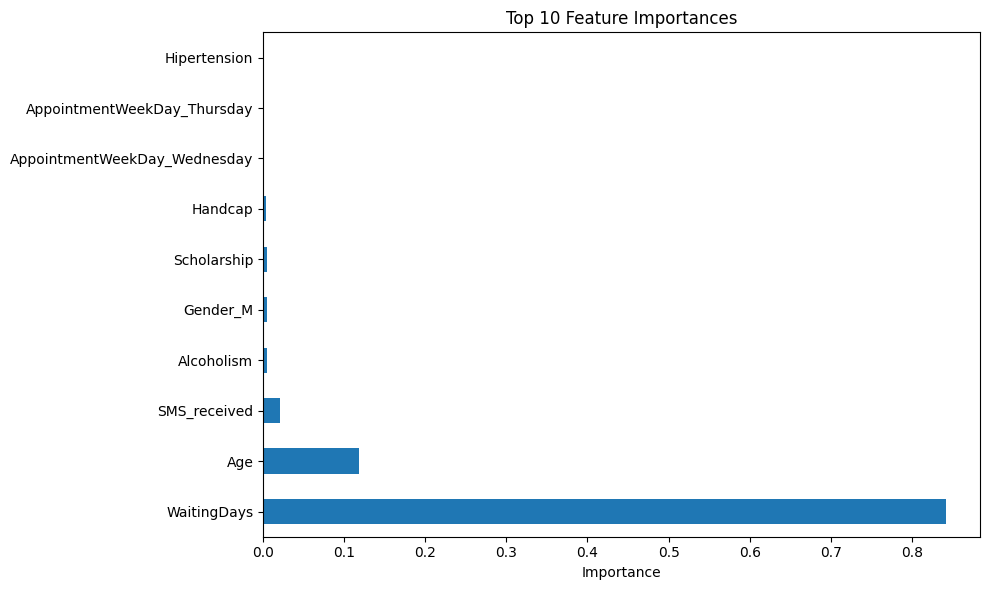

In [ ]:
# Section 6: Feature Importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
# Section 7: Trend Insights (for Power BI)
# Save relevant columns for dashboard
# Include one-hot encoded columns for AppointmentWeekDay instead of the original column

# Get the actual one-hot encoded column names for AppointmentWeekDay
appointment_weekday_cols = [col for col in df.columns if col.startswith('AppointmentWeekDay_')]

# Include these columns along with other relevant columns in dashboard_data
dashboard_data = df[['Age', 'Scholarship', 'Hipertension', 'Diabetes',
                     'Alcoholism', 'Handcap', 'SMS_received', 'WaitingDays',
                     'No-show'] + appointment_weekday_cols]

dashboard_data.to_csv('no_show_dashboard_data.csv', index=False)